In [132]:
import pandas as pd
import numpy as np 
#import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import collections

In [133]:
df_credit_card = pd.read_csv('creditcard_new.csv')

In [134]:
df_credit_card.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [135]:
df_credit_card.shape

(284807, 31)

In [136]:
df_credit_card.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n 0: Legitimate, 1: Fraud')

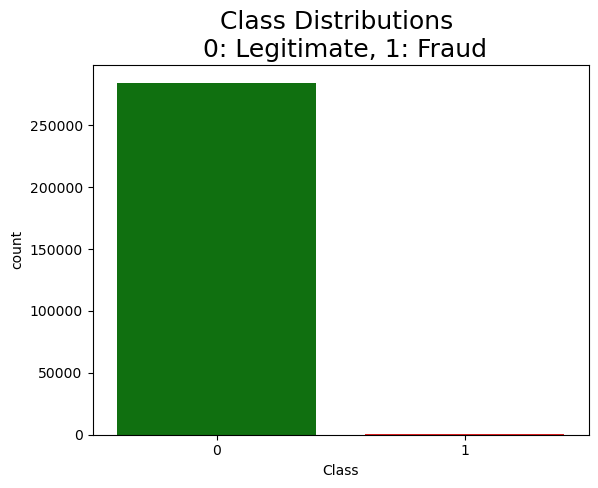

In [137]:
colors = ["green", "red"]
sns.countplot(x='Class', data=df_credit_card, palette=colors)
plt.title('Class Distributions \n 0: Legitimate, 1: Fraud', fontsize=18)

In [138]:
print('Legitimate Cases:', round(df_credit_card['Class'].value_counts()[0] / df_credit_card.shape[0] * 100, 2))
print('Fraud Cases:', round(df_credit_card['Class'].value_counts()[1] / df_credit_card.shape[0] * 100, 2))

Legitimate Cases: 99.83
Fraud Cases: 0.17


In [139]:
df_credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [140]:
df_credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [141]:
print(df_credit_card.Time[df_credit_card.Class == 1].describe())

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_12336\188664443.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount, ax=ax[0], color='g')
C:\Users\asus\AppData\Local\Temp\ipykernel_12336\188664443.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time, ax=ax[1], color='red')


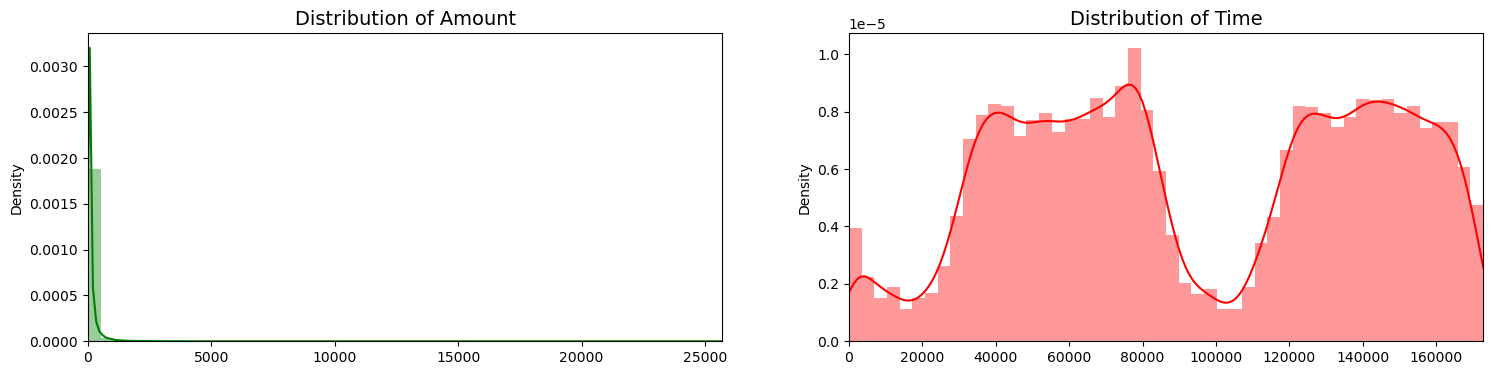

In [142]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount = df_credit_card['Amount'].values
time = df_credit_card['Time'].values

sns.distplot(amount, ax=ax[0], color='g')
ax[0].set_title('Distribution of Amount', fontsize=14)
ax[0].set_xlim([min(amount), max(amount)])

sns.distplot(time, ax=ax[1], color='red')
ax[1].set_title('Distribution of Time', fontsize=14)
ax[1].set_xlim([min(time), max(time)])

plt.show()

In [143]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
df_credit_card['scaled_amount'] = robust_scaler.fit_transform(df_credit_card['Amount'].values.reshape(-1,1))
df_credit_card['scaled_time'] = robust_scaler.fit_transform(df_credit_card['Time'].values.reshape(-1,1))
df_credit_card.drop(['Time','Amount'], axis=1, inplace=True)

In [144]:
df_credit_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [145]:
# move two scaled columns to the first two columns of the dataset
scaled_amount = df_credit_card['scaled_amount']
scaled_time = df_credit_card['scaled_time']

df_credit_card.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

df_credit_card.insert(0, 'scaled_amount', scaled_amount)
df_credit_card.insert(1, 'scaled_time', scaled_time)

df_credit_card.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [146]:
df_credit_card.shape

(284807, 31)

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

y = df_credit_card['Class']
X = df_credit_card.drop('Class', axis=1)

SKF = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in SKF.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]



original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [148]:


df_credit_card = df_credit_card.sample(frac=1)

fraud_df = df_credit_card.loc[df_credit_card['Class'] == 1]
non_fraud_df = df_credit_card.loc[df_credit_card['Class'] == 0][:10000]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])


new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
200811,0.517013,0.574455,2.289816,-1.031285,-2.505287,-1.685444,-0.062845,-1.264266,0.117778,-0.630851,...,-0.289935,0.194692,1.055105,-0.249822,-0.297965,0.678791,0.298514,-0.070997,-0.091389,0
21676,-0.293440,-0.621342,-1.783888,1.245670,2.097173,1.031059,-0.793755,0.566460,-0.403512,0.625924,...,-0.264628,-0.054154,-0.029875,-0.094100,0.056197,0.116731,-0.403204,-1.117816,-0.466715,0
232729,0.065395,0.735347,2.172196,-0.599117,-2.074337,-0.530125,0.027329,-1.031130,0.171689,-0.381250,...,-0.611254,-0.233664,-0.110312,-0.018297,-0.374114,0.235135,0.833238,-0.108557,-0.093172,0
80572,-0.169776,-0.307170,-0.415607,0.956624,2.248477,1.373053,-0.114763,-0.250434,0.542353,-0.301690,...,0.332655,0.032073,0.385700,-0.212276,0.684089,-0.151696,0.647934,-0.182132,-0.143826,0
17390,-0.186544,-0.658090,1.178200,0.248156,0.381575,1.061892,-0.388335,-0.777133,0.070666,-0.054465,...,-0.182550,0.085889,0.208229,-0.080303,0.526109,0.601407,-0.356242,0.004096,0.011263,0


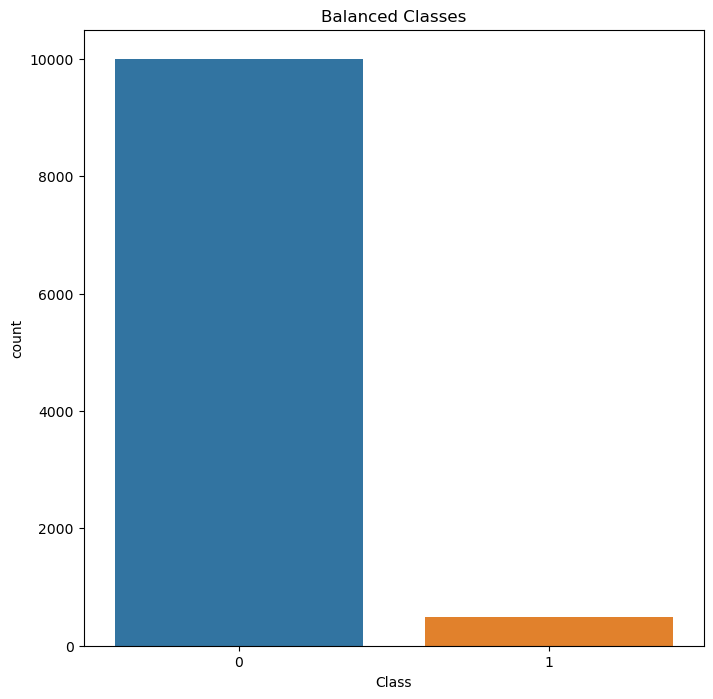

In [149]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Class', data=new_df)
plt.title('Balanced Classes')
plt.show();

In [150]:
new_df.Class.value_counts()

Class
0    10000
1      492
Name: count, dtype: int64

In [151]:
new_df.shape

(10492, 31)

In [152]:
print('Distribution of the Classes in the subsample dataset (under-sampled)')
print(new_df['Class'].value_counts()/new_df.shape[0])

Distribution of the Classes in the subsample dataset (under-sampled)
Class
0    0.953107
1    0.046893
Name: count, dtype: float64


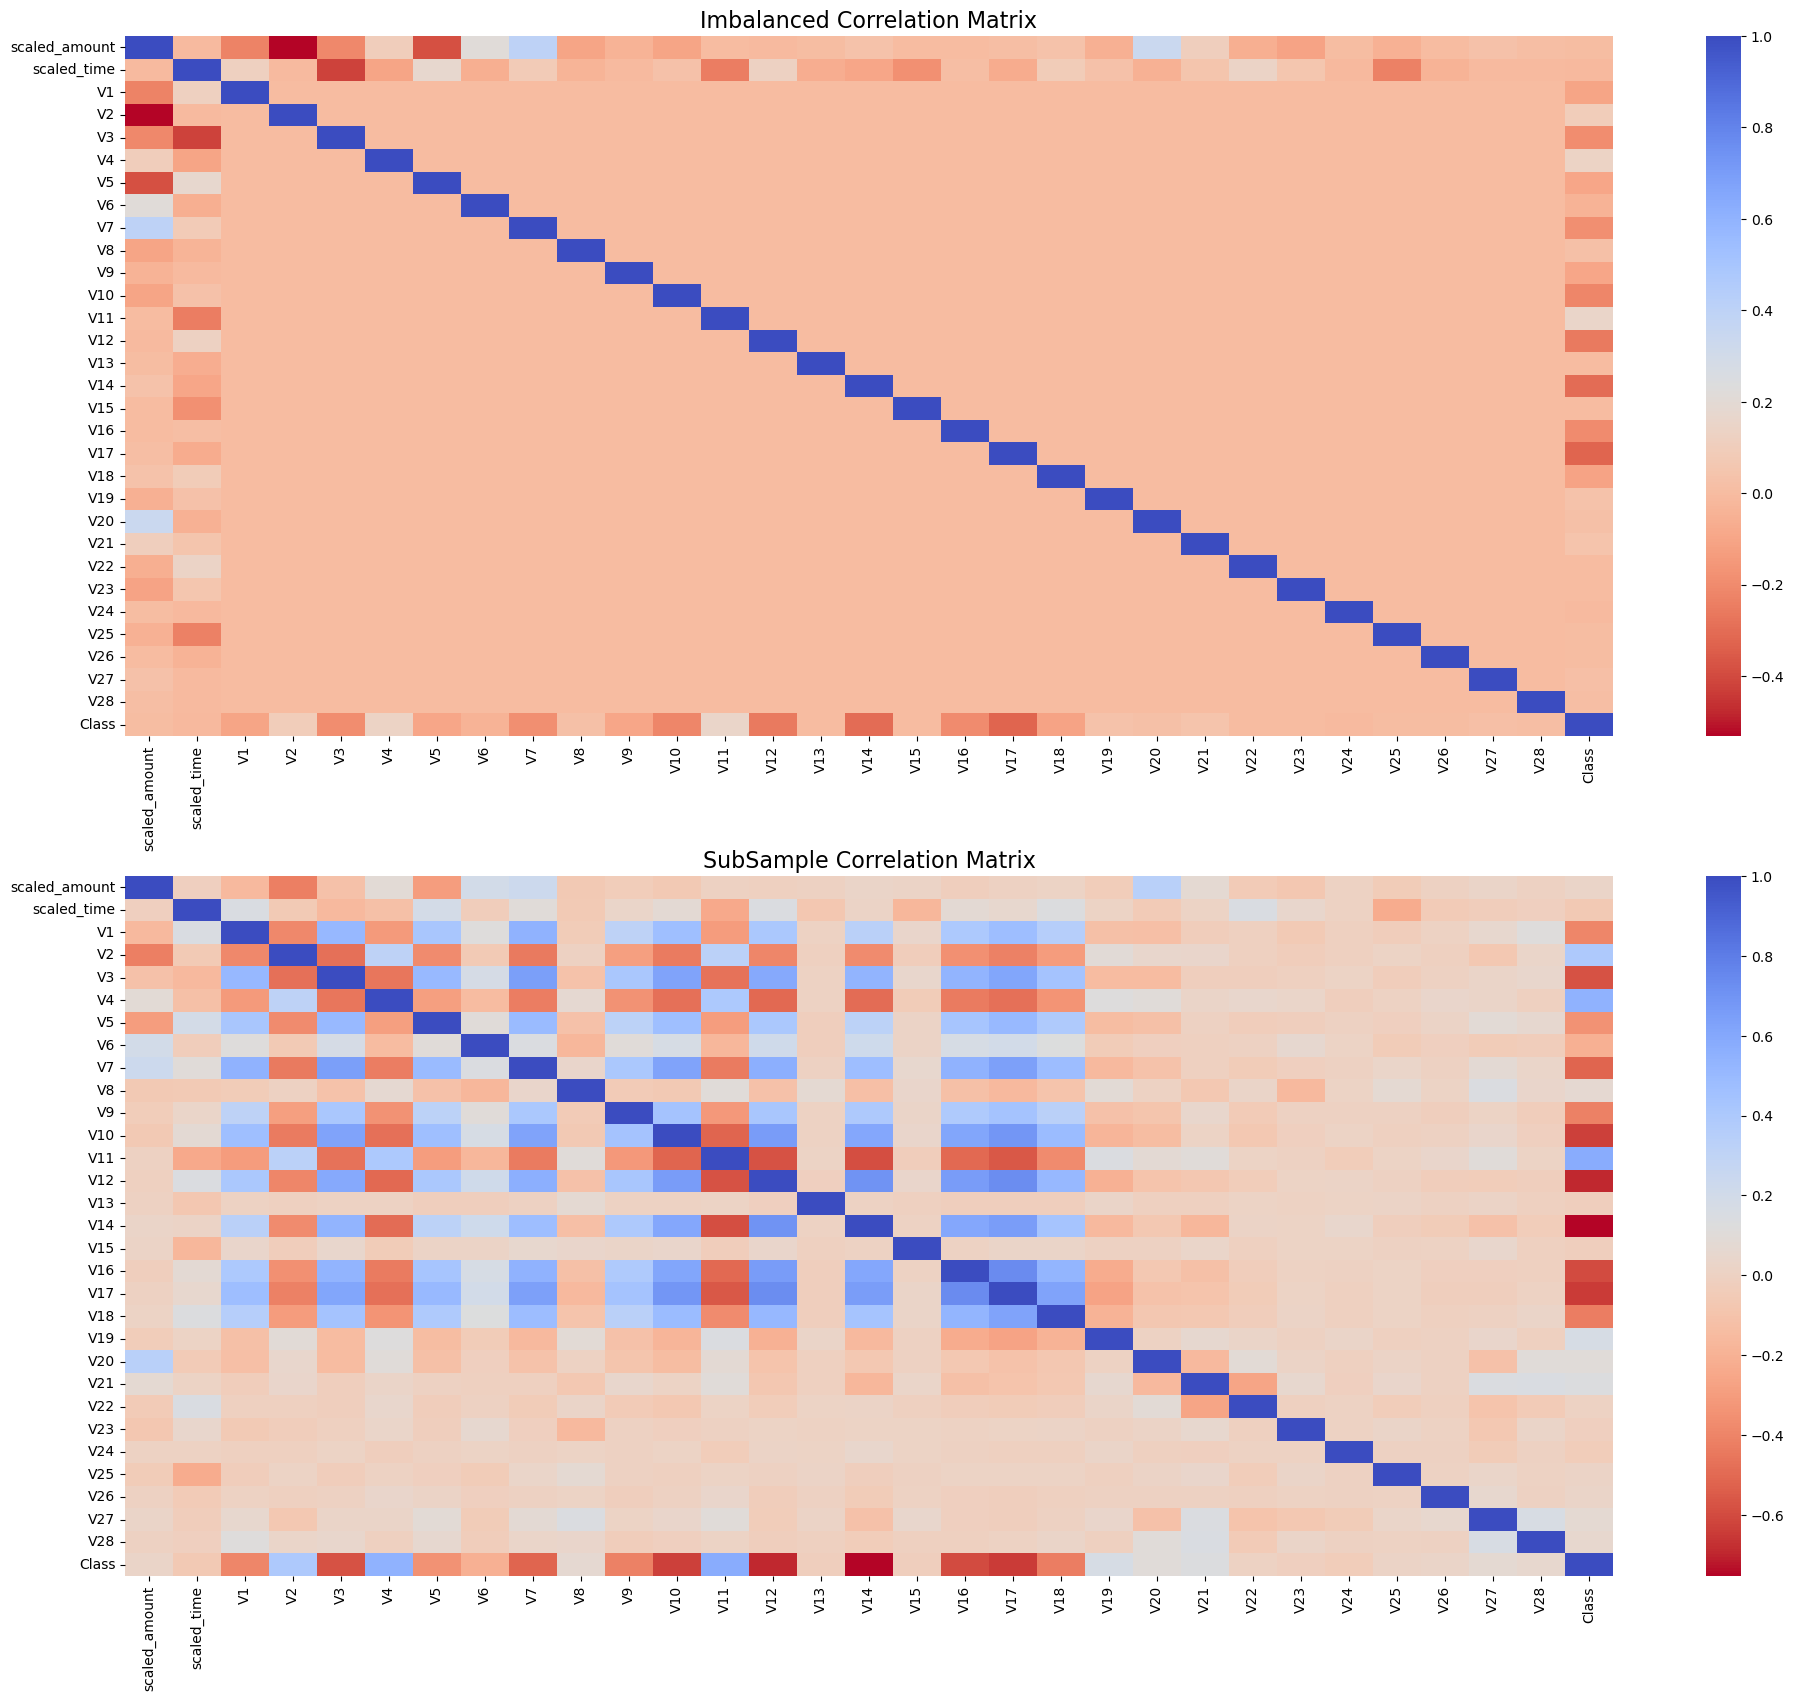

In [153]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df_credit_card.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':18}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=16)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':18}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=16)
plt.show()

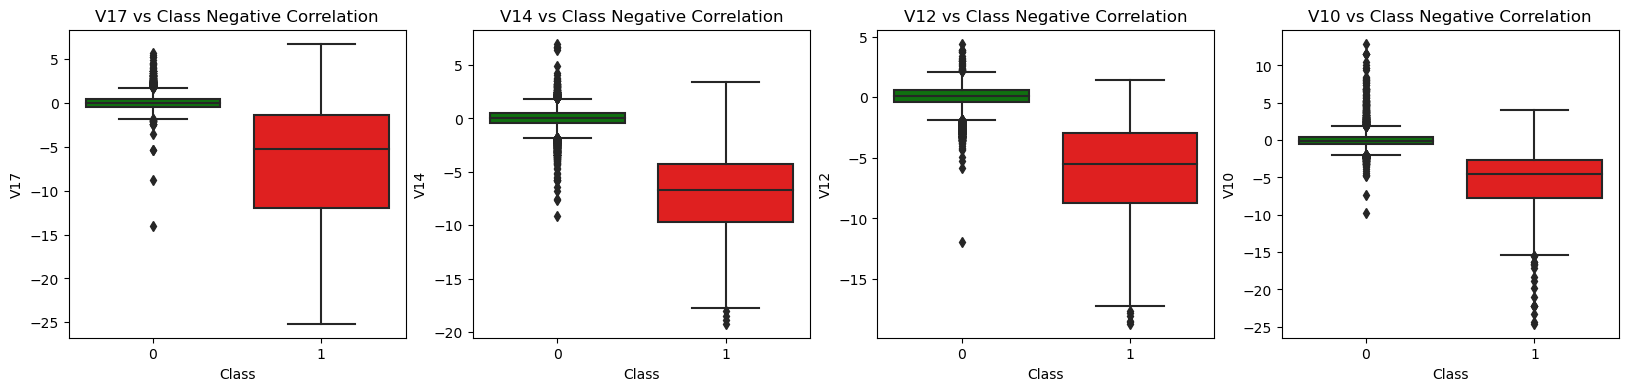

In [154]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_12336\3538466111.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
C:\Users\asus\AppData\Local\Temp\ipykernel_12336\3538466111.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v12_fraud_dist,ax=ax2

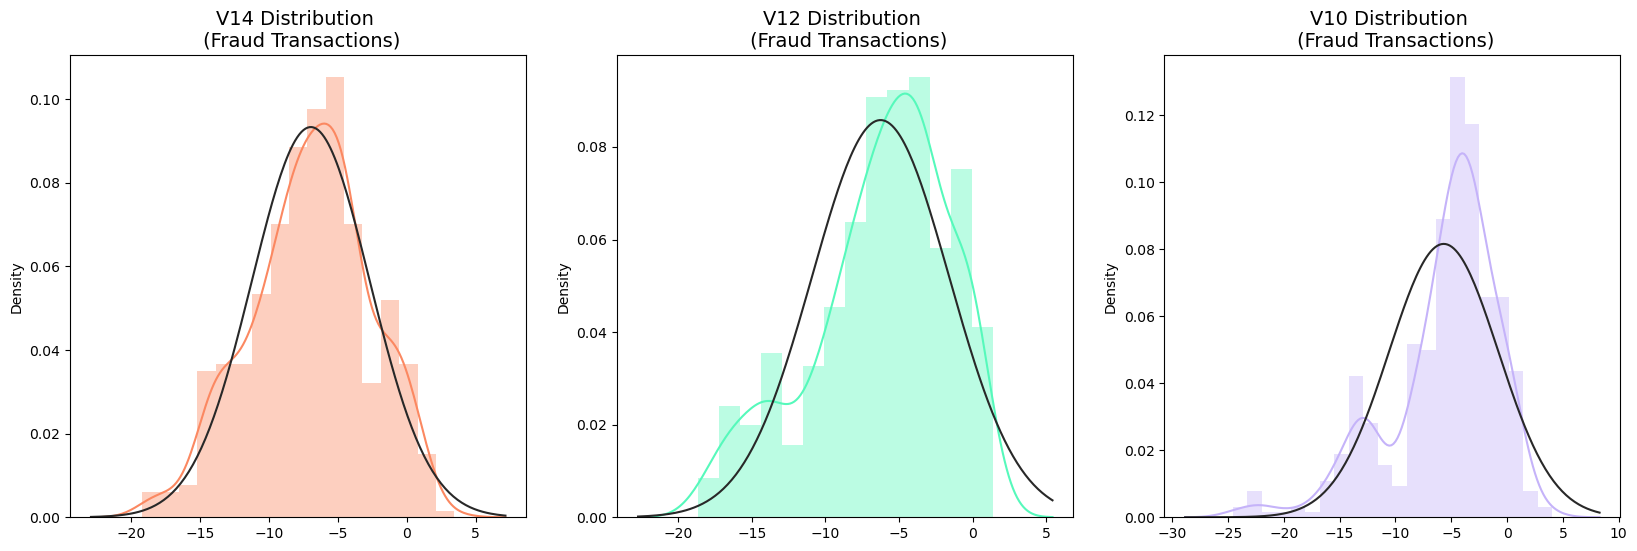

In [155]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [160]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.30, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.50, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

classifiers = {
    "LogisiticRegression": LogisticRegression(solver='lbfgs',max_iter=10000),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(gamma='auto'),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    }

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier:", classifier.__class__.__name__, ", Training score:", round(training_score.mean(), 2) * 100, "%")
   # y_pred = classifier.predict(X_test)
   # acc = accuracy_score(y_test,y_pred)
   # print("Classifier:", classifier.__class__.__name__,",\n Classification Report:", classification_report(y_test,y_pred))
   # print("Classifier:", classifier.__class__.__name__, ", Accuracy score:", round(acc, 2) * 100, "%")
   # ConfusionMatrixDisplay.from_estimator(classifier,X_test,y_test,normalize='true')


Classifier: LogisticRegression , Training score: 99.0 %
Classifier: KNeighborsClassifier , Training score: 99.0 %
Classifier: SVC , Training score: 99.0 %
Classifier: DecisionTreeClassifier , Training score: 98.0 %
Classifier: RandomForestClassifier , Training score: 99.0 %


In [122]:
len(y_test)

1574

In [27]:
X.shape

(10492, 30)